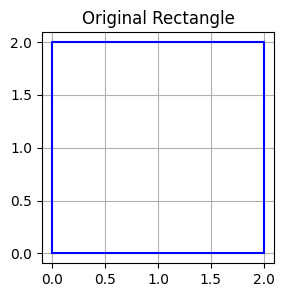

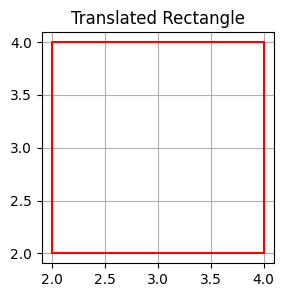

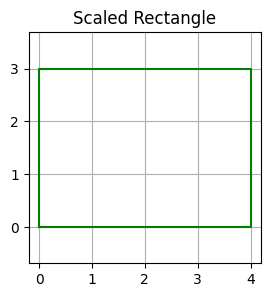

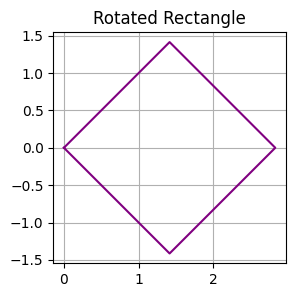

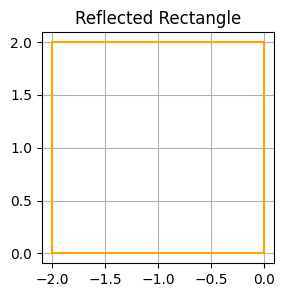

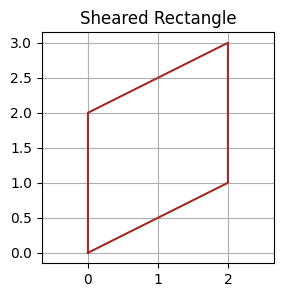

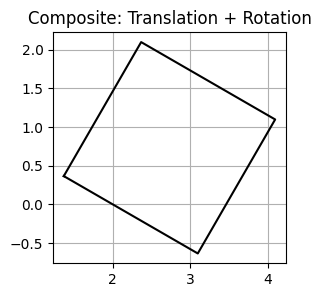

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a simple rectangle as our 2D object
def create_rectangle():
    # Define rectangle vertices (x, y) coordinates
    return np.array([[0, 0],  # bottom-left
                    [2, 0],  # bottom-right
                    [2, 2],  # top-right
                    [0, 2]]) # top-left

# Step 2: Function to plot the shape
def plot_shape(points, color='blue', title='Shape'):
    plt.figure(figsize=(3, 3))
    # Add first point at end to close the shape
    points = np.vstack((points, points[0]))
    plt.plot(points[:, 0], points[:, 1], color=color)
    plt.grid(True)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Step 3: Translation
def translate(points, tx, ty):
    # Move shape by tx units in x and ty units in y
    translated = points + np.array([tx, ty])
    return translated

# Step 4: Scaling
def scale(points, sx, sy):
    # Scale shape by sx in x-direction and sy in y-direction
    scaled = points * np.array([sx, sy])
    return scaled

# Step 5: Rotation
def rotate(points, angle_degrees):
    # Convert angle to radians
    angle = np.radians(angle_degrees)
    # Create rotation matrix
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                              [np.sin(angle), np.cos(angle)]])
    # Apply rotation to each point
    rotated = np.dot(points, rotation_matrix)
    return rotated

# Step 6: Reflection
def reflect(points, axis='x'):
    if axis.lower() == 'x':
        # Reflect about x-axis (multiply y by -1)
        return points * np.array([1, -1])
    else:
        # Reflect about y-axis (multiply x by -1)
        return points * np.array([-1, 1])

# Step 7: Shearing
def shear(points, shx=0):
    # Apply horizontal shear
    shear_matrix = np.array([[1, shx],
                            [0, 1]])
    sheared = np.dot(points, shear_matrix)
    return sheared

# Step 8: Demonstrate all transformations
def main():
    # Create original rectangle
    rectangle = create_rectangle()
    plot_shape(rectangle, 'blue', 'Original Rectangle')

    # 1. Translation
    translated = translate(rectangle, 2, 2)  # Move 2 units right and 2 units up
    plot_shape(translated, 'red', 'Translated Rectangle')

    # 2. Scaling
    scaled = scale(rectangle, 2, 1.5)  # Scale 2x horizontally, 1.5x vertically
    plot_shape(scaled, 'green', 'Scaled Rectangle')

    # 3. Rotation
    rotated = rotate(rectangle, 45)  # Rotate 45 degrees
    plot_shape(rotated, 'purple', 'Rotated Rectangle')

    # 4. Reflection
    reflected = reflect(rectangle, 'y')  # Reflect about y-axis
    plot_shape(reflected, 'orange', 'Reflected Rectangle')

    # 5. Shearing
    sheared = shear(rectangle, 0.5)  # Horizontal shear by 0.5
    plot_shape(sheared, 'brown', 'Sheared Rectangle')

    # 6. Composite Transformation (Translation + Rotation)
    composite = rotate(translate(rectangle, 1, 1), 30)
    plot_shape(composite, 'black', 'Composite: Translation + Rotation')

# Run the demonstration
if __name__ == "__main__":
    main()

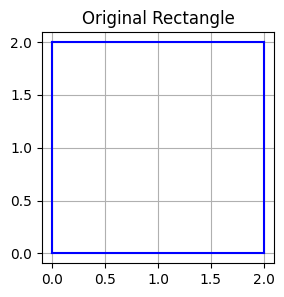

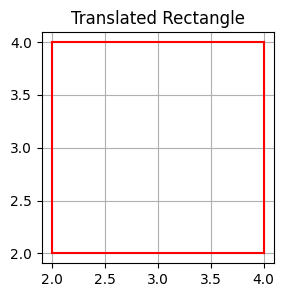

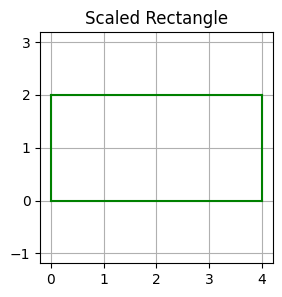

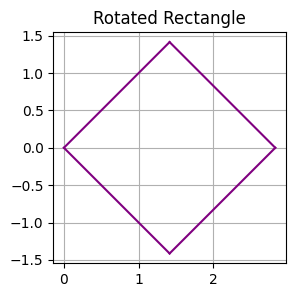

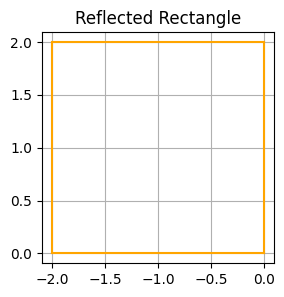

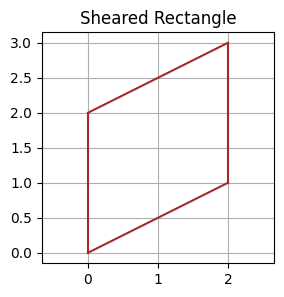

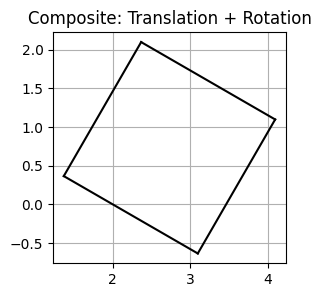

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a simple rectangle
def create_rectangle():
    return np.array([[0, 0],  # bottom-left
                    [2, 0],  # bottom-right
                    [2, 2],  # top-right
                    [0, 2]]) # top-left

# Step 2: Function to plot the shape
def plot_shape(points, color='blue', title='Shape'):
    plt.figure(figsize=(3, 3))

    # Draw lines between consecutive points
    for i in range(len(points)-1):
        x = [points[i][0], points[i+1][0]]
        y = [points[i][1], points[i+1][1]]
        plt.plot(x, y, color=color)

    # Draw the closing line (from last point to first point)
    x = [points[-1][0], points[0][0]]  # x coordinates of last and first points
    y = [points[-1][1], points[0][1]]  # y coordinates of last and first points
    plt.plot(x, y, color=color)

    plt.grid(True)
    plt.title(title)
    plt.axis('equal')
    plt.show()

# Step 3: Translation
def translate(points, tx, ty):
    translated = points + np.array([tx, ty])
    return translated

# Step 4: Scaling
def scale(points, sx, sy):
    scaled = points * np.array([sx, sy])
    return scaled

# Step 5: Rotation
def rotate(points, angle_degrees):
    angle = np.radians(angle_degrees)
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
    rotated = np.dot(points, rotation_matrix)
    return rotated

# Step 6: Reflection
def reflect(points, axis='x'):
    if axis.lower() == 'x':
        return points * np.array([1, -1])
    else:
        return points * np.array([-1, 1])

# Step 7: Shearing
def shear(points, shx=0):
    shear_matrix = np.array([[1, shx],
                            [0, 1]])
    sheared = np.dot(points, shear_matrix)
    return sheared

# Step 8: Demonstrate transformations
def main():
    # Create original rectangle
    rectangle = create_rectangle()
    plot_shape(rectangle, 'blue', 'Original Rectangle')

    # Translation
    translated = translate(rectangle, 2, 2)
    plot_shape(translated, 'red', 'Translated Rectangle')

    # Scaling
    scaled = scale(rectangle, 2, 1)
    plot_shape(scaled, 'green', 'Scaled Rectangle')

    # Rotation
    rotated = rotate(rectangle, 45)
    plot_shape(rotated, 'purple', 'Rotated Rectangle')

    # Reflection
    reflected = reflect(rectangle, 'y')
    plot_shape(reflected, 'orange', 'Reflected Rectangle')

    # Shearing
    sheared = shear(rectangle, 0.5)
    plot_shape(sheared, 'brown', 'Sheared Rectangle')

    # Composite
    composite = rotate(translate(rectangle, 1, 1), 30)
    plot_shape(composite, 'black', 'Composite: Translation + Rotation')

if __name__ == "__main__":
    main()

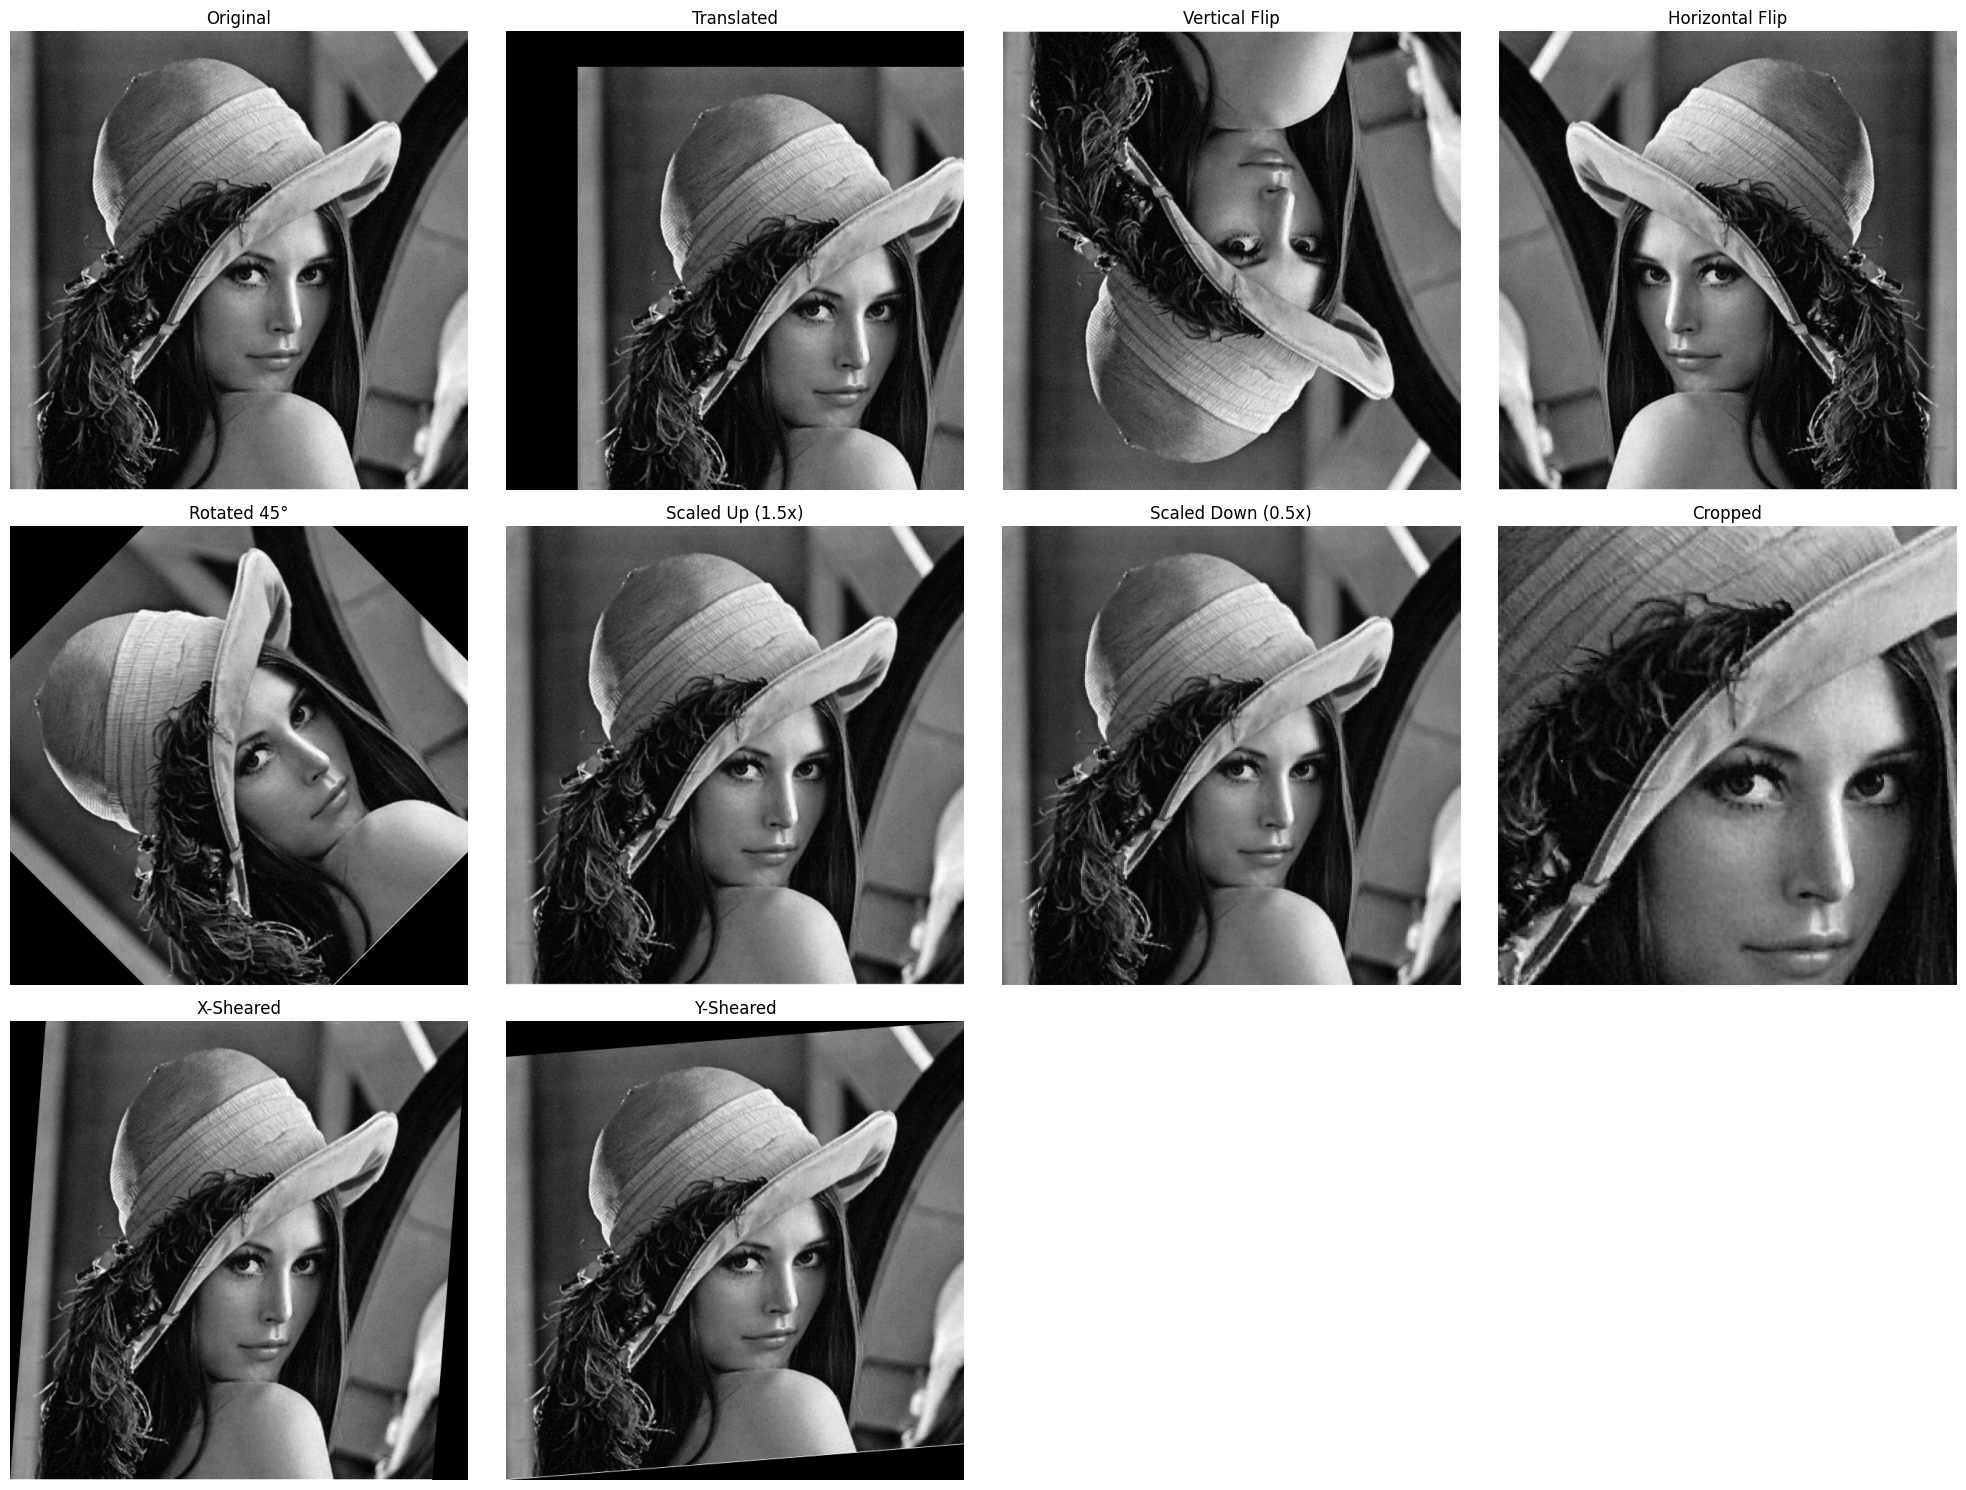

All transformations completed and plotted successfully!


<Figure size 640x480 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def perform_and_plot_transformations(image_path):
    # Read the image
    img = cv2.imread(image_path)
    if img is None:
        raise Exception("Error: Could not read the image")

    # Convert BGR to RGB for proper matplotlib display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    height, width = img.shape[:2]

    # Perform all transformations
    # 1. Translation
    translation_matrix = np.float32([[1, 0, 100], [0, 1, 50]])
    translated = cv2.warpAffine(img, translation_matrix, (width, height))

    # 2. Flips_reflection
    vertical_flip = cv2.flip(img, 0)
    horizontal_flip = cv2.flip(img, 1)

    # 3. Rotation
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 45, 1.0)
    rotated = cv2.warpAffine(img, rotation_matrix, (width, height))

    # 4. Scaling
    scaled_up = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    scaled_down = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

    # 5. Cropping
    start_row, start_col = height//4, width//4
    end_row, end_col = 3*height//4, 3*width//4
    cropped = img[start_row:end_row, start_col:end_col]

    # 6. Shearing
    pts1 = np.float32([[0, 0], [width, 0], [0, height]])
    pts2 = np.float32([[50, 0], [width, 0], [0, height]])
    shear_matrix_x = cv2.getAffineTransform(pts1, pts2)
    sheared_x = cv2.warpAffine(img, shear_matrix_x, (width, height))

    pts2 = np.float32([[0, 50], [width, 0], [0, height]])
    shear_matrix_y = cv2.getAffineTransform(pts1, pts2)
    sheared_y = cv2.warpAffine(img, shear_matrix_y, (width, height))

    # Create figure for plotting
    plt.figure(figsize=(20, 15))

    # Plot all transformations
    images = [
        (img, 'Original'),
        (translated, 'Translated'),
        (vertical_flip, 'Vertical Flip'),
        (horizontal_flip, 'Horizontal Flip'),
        (rotated, 'Rotated 45°'),
        (scaled_up, 'Scaled Up (1.5x)'),
        (scaled_down, 'Scaled Down (0.5x)'),
        (cropped, 'Cropped'),
        (sheared_x, 'X-Sheared'),
        (sheared_y, 'Y-Sheared')
    ]

    # Plot each transformation
    for idx, (image, title) in enumerate(images, 1):
        plt.subplot(3, 4, idx)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    # Save the plot
    plt.savefig('all_transformations.png', bbox_inches='tight', dpi=300)

    # Return dictionary of transformed images
    return {
        'original': img,
        'translated': translated,
        'vertical_flip_reflection': vertical_flip,
        'horizontal_flip_reflection': horizontal_flip,
        'rotated': rotated,
        'scaled_up': scaled_up,
        'scaled_down': scaled_down,
        'cropped': cropped,
        'sheared_x': sheared_x,
        'sheared_y': sheared_y
    }

# Example usage
if __name__ == "__main__":
    try:
        # Replace with your image path
        transformations = perform_and_plot_transformations('/content/Screenshot 2025-01-13 092444.png')
        print("All transformations completed and plotted successfully!")

    except Exception as e:
        print(f"An error occurred: {str(e)}")